In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Credit-card-fraud-Data-set.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("\n--- Dataset Shape ---")
print(df.shape)
print("--- Dataset Info ---")
print(df.info())



--- Dataset Shape ---
(284807, 31)
--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  floa

In [4]:
print("\n--- Missing Values in Each Column ---")
print(df.isnull().sum())
print("\nTotal Missing Values:", df.isnull().sum().sum())



--- Missing Values in Each Column ---
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Total Missing Values: 0


In [5]:
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_count}")



Duplicate Rows: 1081


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print("-------To check Duplicates After Droping-----")
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_count}")

-------To check Duplicates After Droping-----

Duplicate Rows: 0


In [10]:
class_counts = df["Class"].value_counts()
print("\n--- Class Distribution ---")
print(class_counts)
fraud_percentage = class_counts[1] / class_counts.sum() * 100
print(f"\nFraud Percentage: {fraud_percentage:.6f}%")



--- Class Distribution ---
Class
0    283253
1       473
Name: count, dtype: int64

Fraud Percentage: 0.166710%


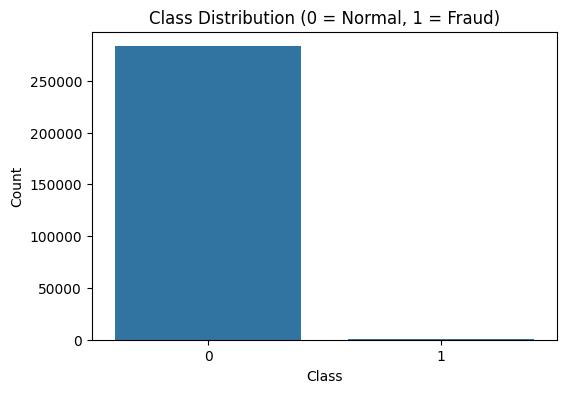

In [17]:
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [18]:
fraud = df[df["Class"] == 1]
normal = df[df["Class"] == 0].sample(30000, random_state=42)
df_small = pd.concat([fraud, normal]).sample(frac=1, random_state=42).reset_index(drop=True)
print("\nNew Balanced Shape:", df_small.shape)
df_small["Class"].value_counts()



New Balanced Shape: (30473, 31)


Class
0    30000
1      473
Name: count, dtype: int64

In [19]:
df_small.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,30473.000000,30473.000000,30473.000000,30473.000000,30473.000000,30473.000000,30473.000000,30473.000000,30473.000000,30473.000000,...,30473.000000,30473.000000,30473.000000,30473.000000,30473.000000,30473.000000,30473.000000,30473.000000,30473.000000,30473.000000
mean,94743.429331,-0.071718,0.040029,-0.091372,0.080429,-0.042370,-0.025734,-0.075549,0.014846,-0.039637,...,0.008443,0.007593,0.002291,0.001295,-0.000619,0.001091,0.005351,0.006007,88.898585,0.015522
std,47439.277526,2.182452,1.786568,1.869813,1.555766,1.568985,1.356942,1.595947,1.372964,1.168272,...,0.811765,0.733300,0.656409,0.599255,0.522178,0.482173,0.419104,0.338617,247.438519,0.123618
min,4.000000,-46.855047,-45.607973,-31.103685,-5.683171,-32.092129,-21.248752,-43.557242,-50.943369,-13.434066,...,-22.797604,-8.887017,-27.533643,-2.776600,-4.781606,-1.732917,-7.976100,-8.464609,0.000000,0.000000
25%,54300.000000,-0.939105,-0.587329,-0.926533,-0.838328,-0.699687,-0.780087,-0.574210,-0.208088,-0.672188,...,-0.227127,-0.538353,-0.162402,-0.349154,-0.317979,-0.324272,-0.068626,-0.052423,5.340000,0.000000
50%,84704.000000,0.003768,0.082382,0.151611,0.024998,-0.059960,-0.283186,0.028454,0.028304,-0.062684,...,-0.024013,0.010100,-0.010158,0.042130,0.017394,-0.052714,0.004303,0.012392,21.490000,0.000000
75%,139206.000000,1.306321,0.828311,1.013222,0.809324,0.600598,0.387716,0.558407,0.336464,0.587218,...,0.194951,0.537444,0.150213,0.434847,0.350282,0.240285,0.098374,0.082689,76.070000,0.000000
max,172777.000000,2.451888,22.057729,4.187811,13.143668,31.457046,21.393069,34.303177,20.007208,8.918202,...,27.202839,8.361985,17.297845,4.016342,4.881207,3.155327,6.943659,15.124103,7712.430000,1.000000


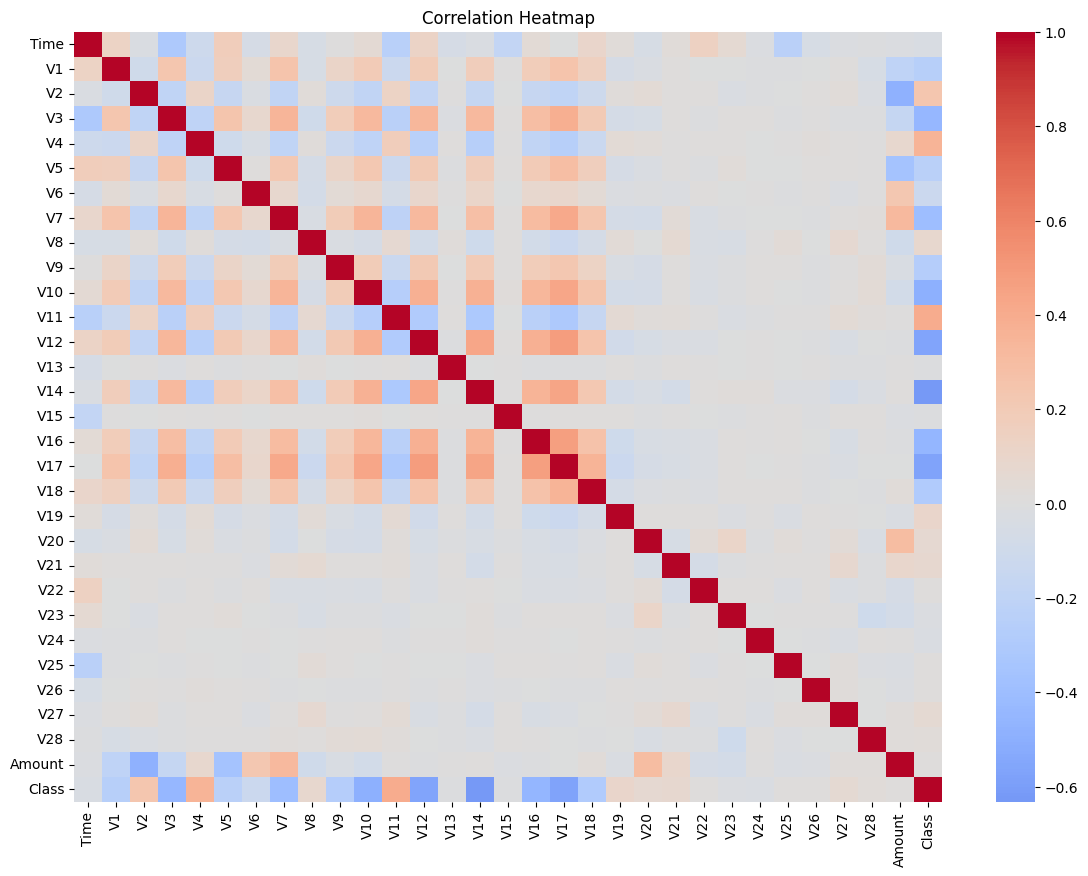

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(df_small.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


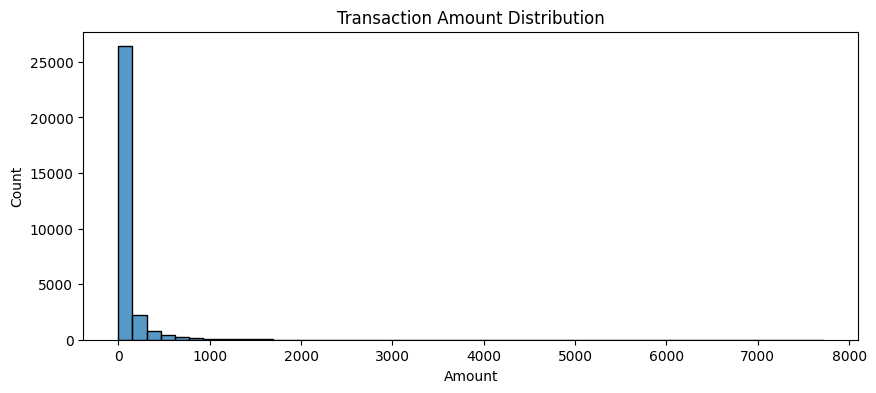

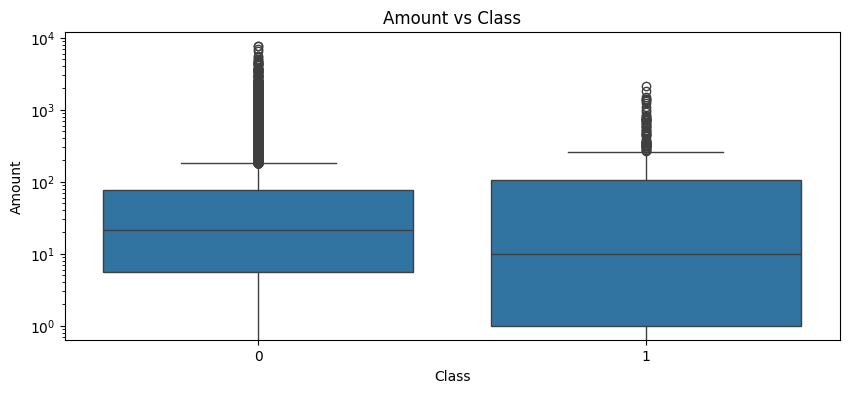

In [21]:
plt.figure(figsize=(10,4))
sns.histplot(df_small["Amount"], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x="Class", y="Amount", data=df_small)
plt.title("Amount vs Class")
plt.yscale("log")
plt.show()


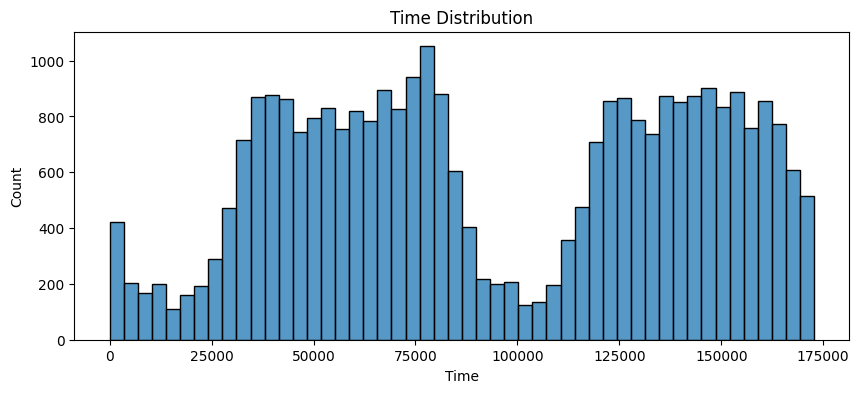

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(df_small["Time"], bins=50)
plt.title("Time Distribution")
plt.show()


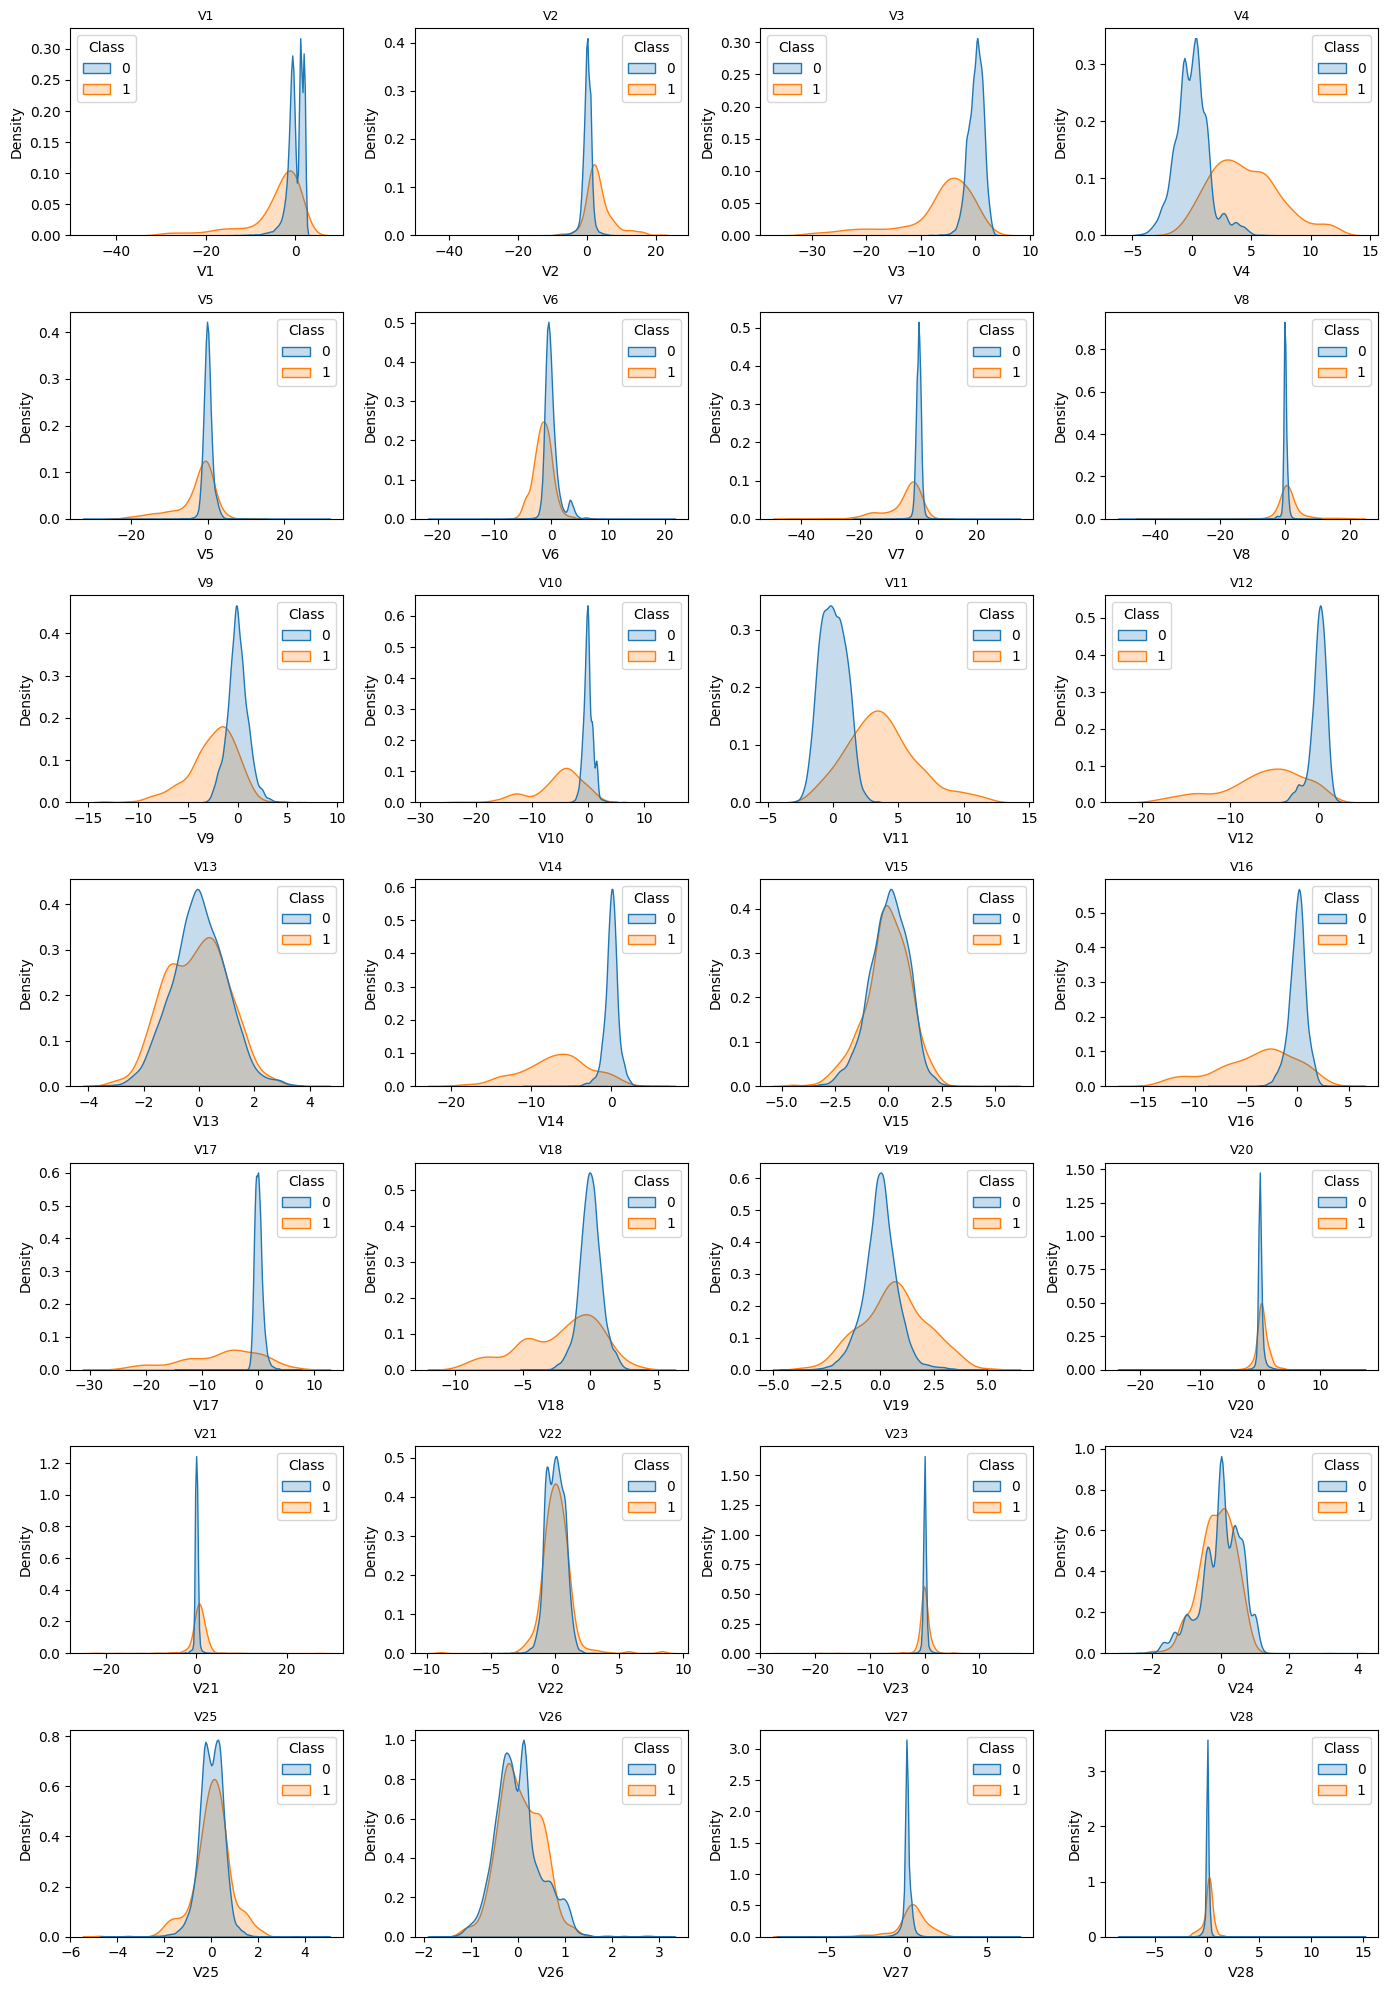

In [23]:
pca_cols = [f"V{i}" for i in range(1, 29)]
plt.figure(figsize=(14,20))
for i, col in enumerate(pca_cols, 1):
    plt.subplot(7, 4, i)
    sns.kdeplot(data=df_small, x=col, hue="Class", fill=True, common_norm=False)
    plt.title(col, fontsize=9)
plt.tight_layout()
plt.show()


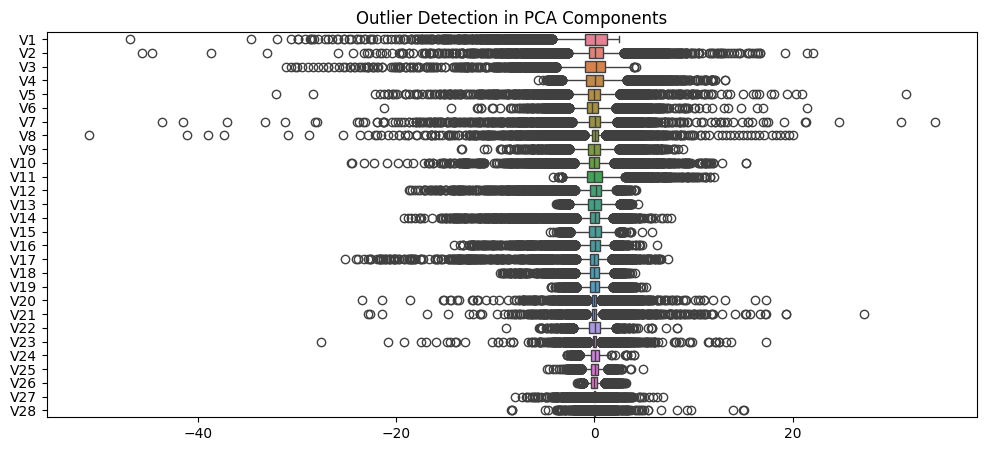

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_small[pca_cols], orient="h")
plt.title("Outlier Detection in PCA Components")
plt.show()


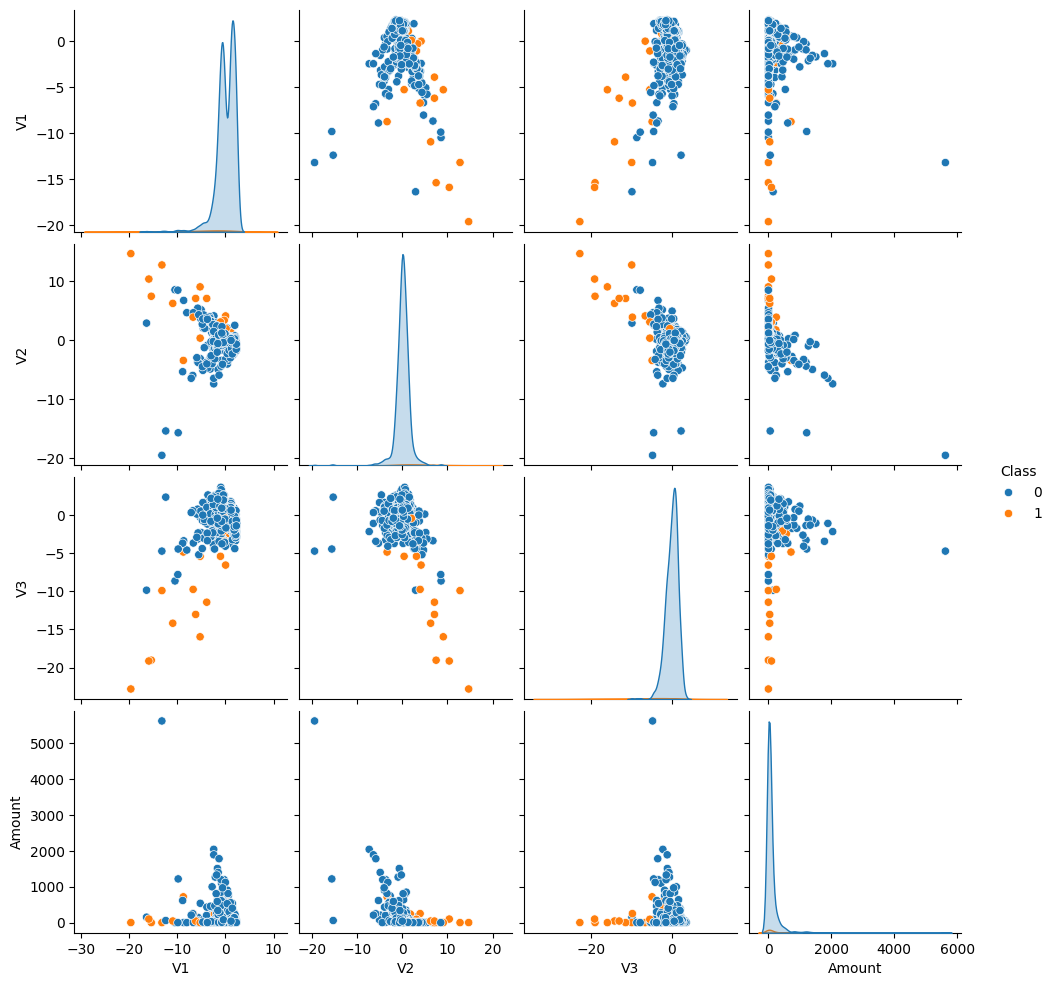

In [25]:
sample_for_pairplot = df_small.sample(1000, random_state=42)
sns.pairplot(sample_for_pairplot[["V1","V2","V3","Amount","Class"]], hue="Class")
plt.show()


In [27]:
df.to_excel("Credit_card_fraud_clean_Data.xlsx",index=False)